# machine Learning


problem statement>> data understanding >> Data preperation >>model building >> model evalution

Supervised learning > (y dependent variable is present)

unsupervised learning > (y dependent vaible is absent)

# Simple linear regression(supervised ml algorithm)

* Legendre in 1805 and gauss in 1809.term  regression is painted by francis Galton

Regression>>>>> To establish a reletion between two or more than two variable

In [ ]:
# target variable always on Y axis

In [ ]:
#only one independent variable >> simple linear regression

**Agenda**=>

1. PROblem Statement in various form
2. Implimentation

Todays Topic:
1.simple linear regression

2.Multiple linear regression

3.Evaluation matrices

4.Polynomial regession




**ML Pipeline**

>> Read the data set

>>Prepare the data

>> Feature engeenering and data cleaning

>>Divide the data into X And Y

>>  Divdie the data into train test

>> Feture scaling

>> model training

>> model evalution


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read the data
from sklearn.datasets import load_diabetes

In [ ]:
diabetes = load_diabetes()

In [ ]:
diabetes # real data set

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [ ]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Problem statement : to predict quantitative measure of disease progression one year after baseline

In [ ]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [ ]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [ ]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
df=pd.DataFrame(diabetes.data,columns=diabetes.feature_names)

In [ ]:
df['Target']=diabetes.target

In [ ]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [ ]:
# 2nd step is EDA and feature engeneering (This data is alreardy prepared )

In [ ]:
#3ed step is dividig data into X and Y

In [ ]:
# simple linear regression
x = df['bmi']
y = df['Target']

In [ ]:
x

,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385
...,...
437,0.019662
438,-0.015906
439,-0.015906
440,0.039062


In [ ]:
y

,Target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size =0.20,random_state=111)

In [ ]:
x_train

,bmi
382,0.060618
195,0.025051
391,-0.069797
117,-0.021295
337,-0.012673
...,...
275,-0.011595
86,-0.075186
212,0.003494
364,-0.006206


In [ ]:
y_train

,Target
382,132.0
195,122.0
391,63.0
117,281.0
337,91.0
...,...
275,94.0
86,55.0
212,73.0
364,262.0


In [ ]:
#scaling
#model training

from sklearn.linear_model import LinearRegression

In [ ]:
#using train_test_split we acheive model trainning
# fit >> calculate the parameter whcih we have
# transform >> apply the parameter on formula
#fit thanform are done on train data
# only tranform is done on test data

fit >> trining the model

predict >> predict on the datasets

In [ ]:
model = LinearRegression()

In [ ]:
model

LinearRegression()

In [ ]:
x_train_reshaped = x_train.values.reshape(-1, 1)
x_test_reshaped = x_test.values.reshape(-1, 1)
model.fit(x_train_reshaped,y_train)

LinearRegression()

In [ ]:
model.coef_  #this is m

array([967.56370916])

In [ ]:
model.intercept_     # this is c

150.90412145452734

In [ ]:
# prediction
y_pred=model.predict(x_test_reshaped)

In [ ]:
y_pred

array([275.25594645, 114.65676186, 145.9423173 , 176.18502089,
       164.71365056, 150.11372469, 157.41368763, 122.99957664,
       155.32798393, 128.21383588, 180.35642828, 143.8566136 ,
       240.84183547, 202.25631709, 133.42809512, 191.82779861,
       131.34239143, 146.98516915, 194.95635416, 164.71365056,
       134.47094697, 143.8566136 , 119.8710211 , 182.44213198,
        88.58546566, 132.38524328,  86.49976196, 111.52820632,
       173.05646535, 178.27072459, 199.12776155, 115.69961371,
       127.17098404, 208.51342818, 133.42809512, 138.64235436,
       121.9567248 , 120.91387295, 159.49939132, 145.9423173 ,
       185.57068752, 217.89909481, 127.17098404, 144.89946545,
       142.81376176, 109.44250262, 155.32798393,  82.32835457,
       156.37083578, 164.71365056, 170.97076165, 148.028021  ,
       229.37046514,  72.94268794, 183.48498383,  92.75687305,
       115.69961371, 167.84220611,  99.01398414, 126.12813219,
       104.22824338, 115.69961371, 168.88505796,  87.54

**Model Evaluation**

Evaluation matrices
1. R^2
2. adjusted R^2
3. MSE
4. Rmse
5. Mae

R square ==> variation in Y explained ==> X is capturing Y well ==> error(SSE) will be low ==> better the model will be

**adjusted r square**:- percentage explined variation in y due to x(or it is nothing it penlizes r square as we add new feture

**Note** :- As we ADD MORE FEATURES r square will improve or remain as it is(constant)

adj r squrare= 1-(1-R^2)(N-1)/(N-P-1)

whre p - no of feature

** adj r square < r square

**only add fetures in the model if the difference between r square and adj r square is not more than 3-5%

**MSE - mean square error**

-- lower the mse better the model will be

-- when it is uswe as a cost function it is differentiable

-- emphasis on large error

**Visualize the result**

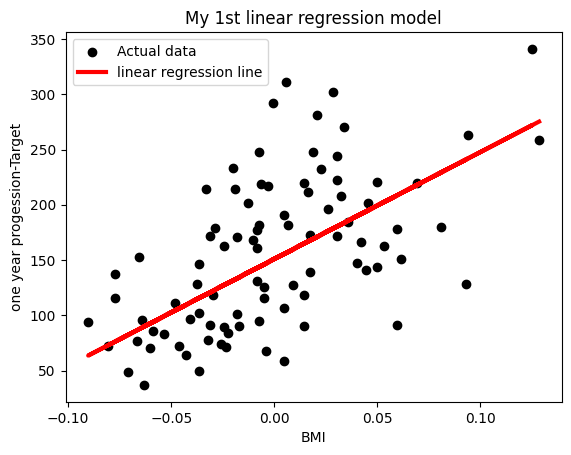

In [ ]:
plt.scatter(x_test,y_test,color='black',label='Actual data')
plt.plot(x_test,y_pred,color='red',linewidth=3,label="linear regression line")
plt.xlabel("BMI")
plt.ylabel("one year progession-Target")
plt.title("My 1st linear regression model")
plt.legend()
plt.show()

#2nd simple linear regression model

In [ ]:
df= pd.read_csv('/content/height-weight.csv')

In [ ]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


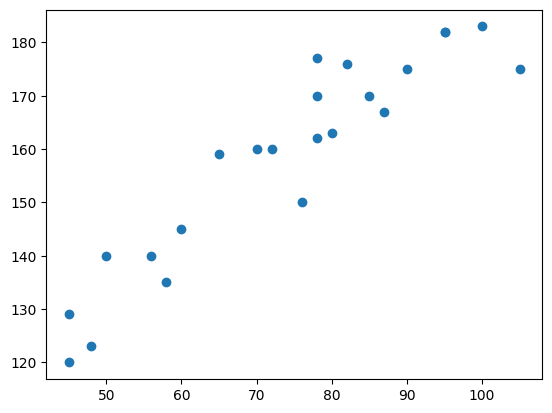

In [ ]:
plt.scatter(df.Weight,df.Height)
plt.show()

In [ ]:
#Divide the data into x and y

In [ ]:
x=df[['Weight']]

In [ ]:
y=df[['Height']]

In [ ]:
x

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [ ]:
y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [ ]:
#train ,tests,split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=123)

In [ ]:
x_train

,Weight
11,95
4,70
3,60
22,72
12,105
15,78
9,78
16,50
0,45
1,58


In [ ]:
y_train

,Height
11,182
4,160
3,145
22,160
12,175
15,177
9,170
16,140
0,120
1,135


In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
#on train Data >> fit and tranform
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
x_train

array([[ 1.32720661],
       [-0.07724483],
       [-0.63902541],
       [ 0.03511129],
       [ 1.88898719],
       [ 0.37217963],
       [ 0.37217963],
       [-1.20080598],
       [-1.48169627],
       [-0.75138152],
       [ 0.59689186],
       [-0.35813512],
       [ 0.48453575],
       [-0.86373764],
       [-1.3131621 ],
       [ 1.6080969 ]])

In [ ]:
x_test

array([[ 0.37217963],
       [ 0.87778215],
       [-1.48169627],
       [ 0.25982352],
       [ 0.76542604],
       [ 1.32720661],
       [ 1.04631632]])

In [ ]:
#Model Training

from sklearn.linear_model import LinearRegression

In [ ]:
reg= LinearRegression()

In [ ]:
reg

LinearRegression()

In [ ]:
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
print("The coefficient is",reg.coef_)

The coefficient is [[18.34038026]]


In [ ]:
print("the intercept is ",reg.intercept_)

the intercept is  [156.75]


In [ ]:
#y_pred = intercept + coef(x)*x_train
     #  = 157 + 18 x_train

In [ ]:
reg.predict(x_train)

array([[181.09147394],
       [155.33330046],
       [145.03003107],
       [157.39395434],
       [191.39474333],
       [163.57591597],
       [163.57591597],
       [134.72676167],
       [129.57512698],
       [142.96937719],
       [167.69722373],
       [150.18166576],
       [165.63656985],
       [140.90872331],
       [132.6661078 ],
       [186.24310863]])

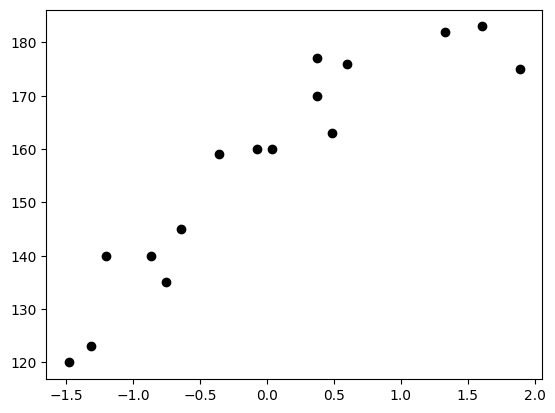

In [ ]:
plt.scatter(x_train,y_train,color='black',label="Actual data")


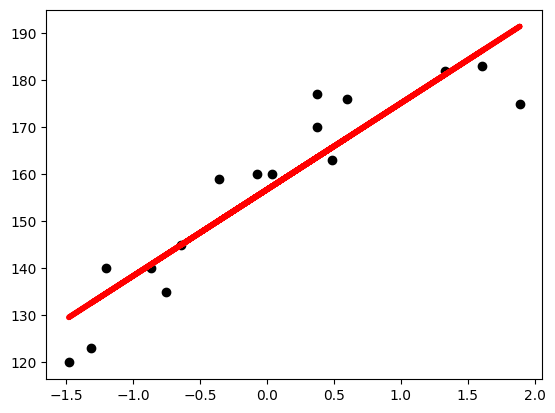

In [ ]:
plt.scatter(x_train,y_train,color='black',label="Actual data")
plt.plot(x_train,reg.predict(x_train),color='red',linewidth=4,)

In [ ]:
y_pred_test = reg.predict(x_test)

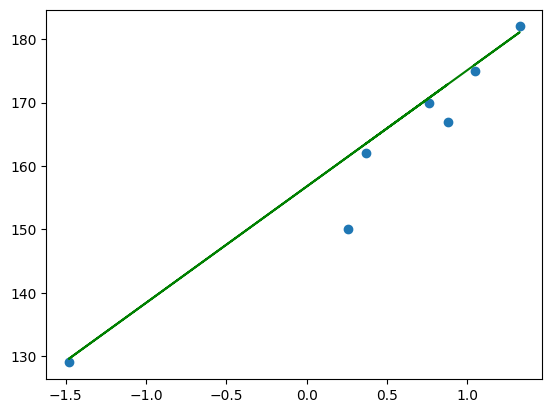

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred_test,'g')

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
mean_squared_error(y_test,y_pred_test)

24.564953138638845

In [ ]:
mean_absolute_error(y_test,y_pred_test)

3.164533331454777

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

4.956304383170877

In [ ]:
score=r2_score(y_test,y_pred_test)

In [ ]:
#adusted r square = 1-(1-r_sq)(N-1)/N-p-1

In [ ]:
score

0.9090599347390976

In [ ]:
x_test.shape[1]

1

In [ ]:
1-(1-score)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)

0.8908719216869172